# ORIE 4580/5580/5581 Assignment 4

#### Students: Riley Coogan (rmc329) and Oscar Calamari (oc67)

### Github link: [Link](https://github.com/OscarC-A/4580-SimModeling)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import sqrt, pi, e
%matplotlib inline


#TODO
#check 1b CIs
#1e
#4

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [ ]:
arrs=scipy.stats.uniform.rvs(0, 1000, size=10000)
arrs.sort()

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
import numpy as np

t_bet = 10.0


def ci95(x):
    m = x.mean()
    se = x.std(ddof=1) / np.sqrt(len(x))
    return m, m - 1.96*se, m + 1.96*se



train_times_det = np.arange(0.0, 1001, t_bet)
idx = np.searchsorted(train_times_det, arrs, side="left")
wait = train_times_det[idx] - arrs

mean_wait, lo, hi = ci95(wait)

print("Mean: " + str(mean_wait))
print("CI: [" + str(lo) + ", "+str(hi)+"]")

Mean: 5.0322151092546274
CI: [4.975457153000219, 5.088973065509036]


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [ ]:
train_times_exp = [0.0]
while train_times_exp[-1] < 1000:
    train_times_exp.append(train_times_exp[-1] + np.random.exponential(t_bet))
train_times_exp = np.array(train_times_exp)

idx = np.searchsorted(train_times_exp, arrs, side="left")
wait = train_times_exp[idx] - arrs

mean_wait, lo, hi = ci95(wait)

print("Mean: " + str(mean_wait))
print("CI: [" + str(lo) + ", "+str(hi)+"]")

Mean: 8.817976615069231
CI: [8.66427950945941, 8.971673720679052]


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [ ]:
t_bet_exp = np.diff(train_times_exp)
mean_t_bet, lo, hi= ci95(t_bet_exp)

print("Mean: " + str(mean_t_bet))
print("CI: [" + str(lo) + ", "+str(hi)+"]")

Mean: 9.760459243306784
CI: [8.061627559597405, 11.459290927016163]


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [ ]:
def find_wait(arrivals, train_times):
    idx = np.searchsorted(train_times, arrivals, side="left")
    I = train_times[idx] - train_times[idx - 1]
    return ci95(I)

mean_I_b, lo_I_b, hi_I_b = find_wait(arrs, train_times_det)
print(f"Uniform Train Method: {mean_I_b:.3f} min "
      f"(95% CI [{lo_I_b:.3f}, {hi_I_b:.3f}])")
mean_I_b, lo_I_b, hi_I_b = find_wait(arrs, train_times_exp)
print(f"Exponential Train Method: {mean_I_b:.3f} min "
      f"(95% CI [{lo_I_b:.3f}, {hi_I_b:.3f}])")

Uniform Train Method: 10.000 min (95% CI [10.000, 10.000])
Exponential Train Method: 17.496 min (95% CI [17.296, 17.695])


The sample mean of the inter-arrival time for part a and b is about double the average waiting time of passengers in part a and b. This is due to the fact that right after a train leaves, because passengers arrive uniformly, their average waiting time is expected to be in the middle of when the last train left, and the next one came.

**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

We notice that $e^{-x^2/2}$ is proportional to the pdf of a normal distribution with mean 0.

If we first only consider the distribution of our x values, we see that the relative probabilities of any x value is also proportional to the height at that given x value, in this case $e^{-x^2/2}$. Since this height function is a scaled version of the normal distribution, the relative probabilities will be the same if we choose x by sampling from a normal distribution N(0,1).

Once we have our x value, we want to sample symetrically across the height at that x value. To accomplish this, we can simply sample from a uniform distribution Unif(0, $e^{-x^2/2}$).

This will give us a uniform distribution over the entire area, by first uniformly sampling the x and then conditionally sampling over the possible y at that x.

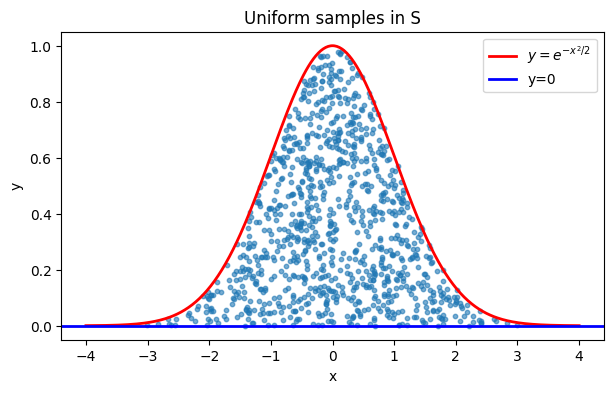

In [ ]:
n = 1000


X = np.random.normal(size=n)
U = np.random.uniform(size=n)
Y = U * np.exp(-X**2 / 2)

# Plot
xx = np.linspace(-4, 4, 400)
plt.figure(figsize=(7,4))
plt.scatter(X, Y, s=10, alpha=0.6)
plt.plot(xx, np.exp(-xx**2/2), 'r', lw=2, label=r'$y=e^{-x^2/2}$')
plt.axhline(0, color='b', lw=2, label = 'y=0')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform samples in S')
plt.legend()
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

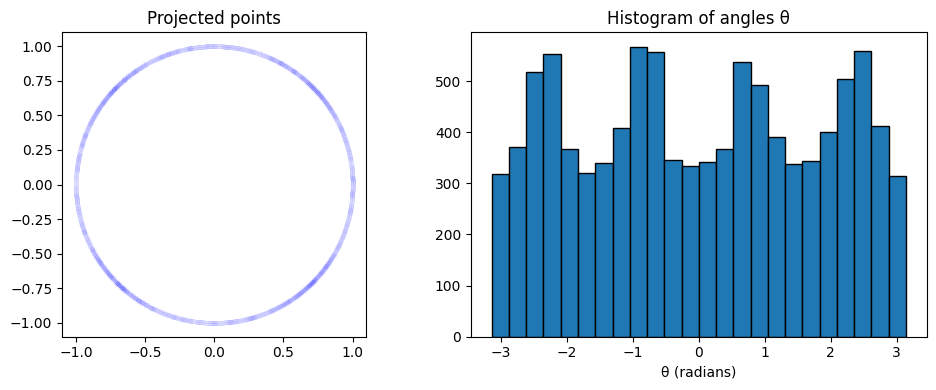

In [ ]:

n = 10000


U = np.random.uniform(-1, 1, size=n)
V = np.random.uniform(-1, 1, size=n)


r = np.hypot(U, V)
mask = r > 0
U, V, r = U[mask], V[mask], r[mask]


X = U / r
Y = V / r


theta = np.arctan2(Y, X)


fig, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].scatter(X, Y, s=10, alpha=0.005, color ='b')
t = np.linspace(0, 2*np.pi, 400)
#ax[0].plot(np.cos(t), np.sin(t), lw=1, color='k')
ax[0].set_aspect('equal')
ax[0].set_title('Projected points')


ax[1].hist(theta, bins=24, edgecolor='k')
ax[1].set_title('Histogram of angles θ')
ax[1].set_xlabel('θ (radians)')

plt.tight_layout()
plt.show()


<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

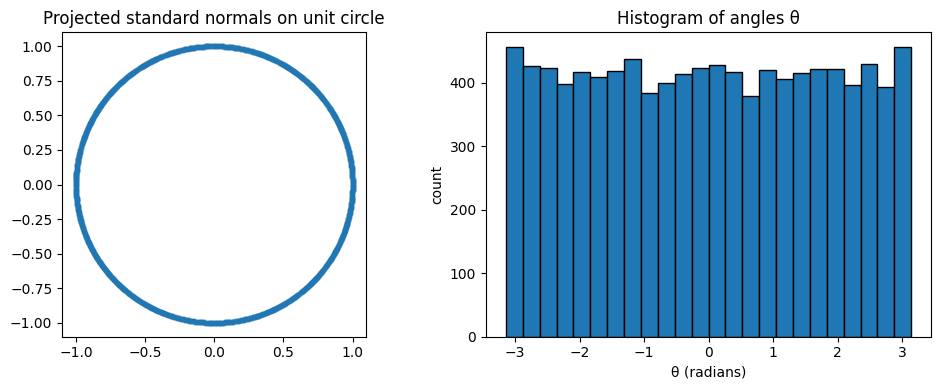

In [ ]:

n = 10000


Z = np.random.normal(size=n)
W = np.random.normal(size=n)


R = np.hypot(Z, W)
X = Z / R
Y = W / R


theta = np.arctan2(Y, X)


fig, ax = plt.subplots(1, 2, figsize=(10,4))


ax[0].scatter(X, Y, s=10, alpha=0.05)
t = np.linspace(0, 2*np.pi, 400)
#ax[0].plot(np.cos(t), np.sin(t), lw=2, color='k')
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_title('Projected standard normals on unit circle')
ax[0].set_xlim(-1.1, 1.1)
ax[0].set_ylim(-1.1, 1.1)


ax[1].hist(theta, bins=24, edgecolor='k')
ax[1].set_title('Histogram of angles θ')
ax[1].set_xlabel('θ (radians)')
ax[1].set_ylabel('count')

plt.tight_layout()
plt.show()

A sample (x,y) in 2D space will map to a point p on the circle if and only if (x,y) lies on the ray starting at (0,0) and passing through p.

The joint distribution of (X,Y) where X and Y are normal variables is

$$
f_{X,Y}(x,y)
= \frac{1}{2\pi}
\exp\!\left(
-\frac{1}{2}(x^{2}+y^{2})
\right),
\qquad x,y\in\mathbb{R}.
$$

This depends only on the distance away from the origin ($r^2 = x^2+y^2$) and not the angle, so it is rotationally symmetric. Therefore, the projection is unbiased.

In contrast, a uniform sampling over a 1x1 square will lead to different length rays of possible (x,y) values for a given point p on the circle, maximal at the rays which reach to the corners of the square. Since the probability of getting a point along a specific ray is not uniform, the sampling over the circumference will also not be uniform.

Therefore, only the second method using two normal variables achieves uniform distributions over the circle circumference.

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.


We can use the cdf of normal variables to calculate the individual probabilities that the return is positive, then find the joint probability.

First, we find the standard deviation of each stock:

$\sigma_{\text{U.S. stocks}}=0.25, \sigma_{\text{U.S. bonds}}=0.1$ and $\sigma_{\text{EM bonds}}=0.30$

Now, we find the z-scores of the outcome zero for each variable:
$z_{\text{U.S. stocks}}=.14/0.25=.56, z_{\text{U.S. bonds}}=.07/0.1=.7$ and $z_{\text{EM bonds}}=.16/0.30\approx.53$

Then we can find the probability of X>0 for each variable, found by the region less than the positive z-score:

$p_{\text{U.S. stocks >0}}\approx .712, z_{\text{U.S. bonds>0}}\approx .758$ and $z_{\text{EM bonds>0}}\approx.703$

Finally, we find the joint distribution:

$.712*.758*.703\approx .3794$

Therefore, the probability that all three financial products simultaneously yield a positive return is approximately 38%

<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [ ]:
import numpy as np
from scipy.linalg import cholesky


mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ]
])

n = 1_000_000



L = cholesky(Sigma, lower=True)


Z = np.random.normal(size=(n, 3))
X = mu + Z @ L.T


all_pos = np.all(X > 0, axis=1)
p_hat = all_pos.mean()


se = np.sqrt(p_hat * (1 - p_hat) / n)
ci_low, ci_high = p_hat - 1.96*se, p_hat + 1.96*se

print(f"Estimated P(all > 0): {p_hat:.4f}")
print(f"95% MC CI: [{ci_low:.4f}, {ci_high:.4f}]  (n={n:,})")


Estimated P(all > 0): 0.3696
95% MC CI: [0.3686, 0.3705]  (n=1,000,000)


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.

For a uniform distribution to have mean 0, we need $\frac{α + β}{2} = 0 \text{, meaning  } |\alpha| = β$

For the variance to be 1, we need $\frac{1}{12}(\beta - \alpha)^2 = 1$

$\beta - \alpha = \sqrt{12}\\
2\beta = 2\sqrt{3}\\
\beta = \sqrt{3}, \alpha = -\sqrt{3}$

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.


In [ ]:
a = -np.sqrt(3)
b = np.sqrt(3)
p = 0.5 # What p are we supposed to use here?

X1 = np.random.uniform(a, b)
X2 = np.random.uniform(a, b)
B = np.random.binomial(1, p)

V1 = X1
V2 = (1 - B)*X1 + B*X2

$\mathbb{E}[V_2] = \mathbb{P}[B=0]*\mathbb{E}[X_1] + \mathbb{P}[B=1]*\mathbb{E}[X_2]\\
= (1-p)\times0 + p\times0 = 0\\
$

$Var(V_2) = \mathbb{E}[V_2^2] - 0^2\\
V_2^2 = ((1-B)X_1 + BX_2)^2 = ((1-B)X_1)^2 + 2(1-B)X_1BX_2 + (BX_2)^2$

Because B can only be 0 or 1, the second term will always come to 0.

$V_2^2 = (1-B)^2X_1^2 + B^2X_2^2$

And for the same reason, $B^2 = B$, and $(1-B)^2 = (1-B).$

$V_2^2 = (1-B)X_1^2 + BX_2^2$

Since B is independent from $X_1$ and $X_2$, the expectation of $V_2^2$ becomes:

$\mathbb{E}[V_2^2] = \mathbb{E}[1-B]\mathbb{E}[X_1^2] + \mathbb{E}[B]\mathbb{E}[X_2^2]\\
= (1-p)\times 1 + p\times1 = 1 - p + p = 1$

<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.


$Cov(V_1, V_2) = \mathbb{E}[V_1V_2]-\mathbb{E}[V_1]\mathbb{E}[V_2] = \sigma_{12}$

The expectation of $V_1$ is 0 so the second term becomes 0. And because of the independence of the variables, the first term is:

$\mathbb{E}[V_1V_2] = \mathbb{E}[1-B]\mathbb{E}[X_1^2] + \mathbb{E}[B]\mathbb{E}[X_1]\mathbb{E}[X_2]\\
=(1-p)\times 1 + p \times 0 \times 0 = 1 - p\\
1 - p = \sigma_{12}$

Thus, we need a value of p such that $p = 1 - \sigma_{12}$

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

Text(0, 0.5, 'V2')

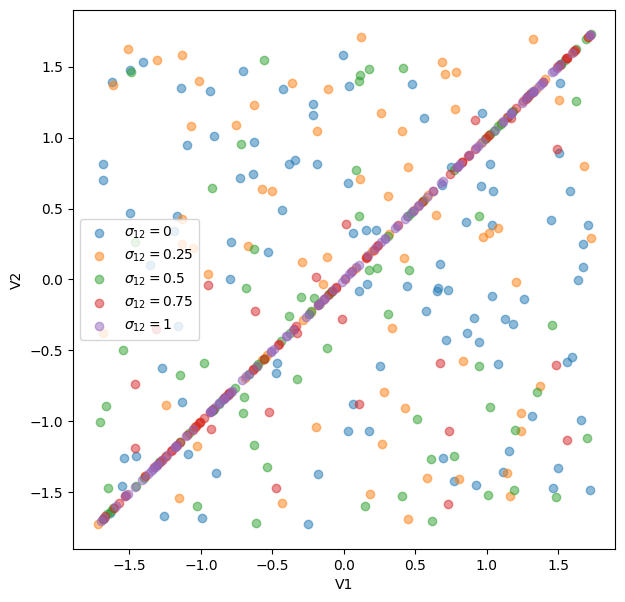

In [ ]:
#function for 2 correlated unif rvs
def correlated_unif(a, b, sigma, n):
    p = 1 - sigma
    X1 = np.random.uniform(a, b, n)
    X2 = np.random.uniform(a, b, n)
    B = np.random.binomial(1, p, n)
    V1 = X1
    V2 = (1-B)*X1 + B*X2
    return V1, V2

n = 100
sig0 = correlated_unif(a, b, 0, n)
sig25 = correlated_unif(a, b, 0.25, n)
sig5 = correlated_unif(a, b, 0.5, n)
sig75 = correlated_unif(a, b, 0.75, n)
sig1 = correlated_unif(a, b, 1, n)

plt.figure(figsize=(7, 7))
plt.scatter(sig0[0], sig0[1], label=r'$\sigma_{12}=0$', alpha=0.5)
plt.scatter(sig25[0], sig25[1], label=r'$\sigma_{12}=0.25$', alpha=0.5)
plt.scatter(sig5[0], sig5[1], label=r'$\sigma_{12}=0.5$', alpha=0.5)
plt.scatter(sig75[0], sig75[1], label=r'$\sigma_{12}=0.75$', alpha=0.5)
plt.scatter(sig1[0], sig1[1], label=r'$\sigma_{12}=1$', alpha=0.5)
plt.legend()
plt.xlabel('V1')
plt.ylabel('V2')


<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [ ]:
V1, V2 = correlated_unif(a, b, 0.5, 100000)
p = np.mean((V1 <= 0) & (V2 <= 0))
print(f"P[V1 <= 0, V2 <= 0] = {p}")

P[V1 <= 0, V2 <= 0] = 0.37588


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


By construction $(Z_1, Z_2) \sim N(0, \Sigma)$ and so individually, $Z_1, Z_2 \sim N(0, 1).$

We know that if Z is standard normal and we apply the standard normal CDF, then $Φ(Z) \sim U(0, 1).$

We then apply the transformation $\alpha + (\beta - \alpha)U$, which makes $U(0, 1)$ become $U(\alpha, \beta)$

And because in part a we selected $\alpha, \beta$ to specificaly yield a uniform distribution with mean 0 and variance 1, we then have $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$.

P[W1 >= 0, W2 >= 0] = 0.3329


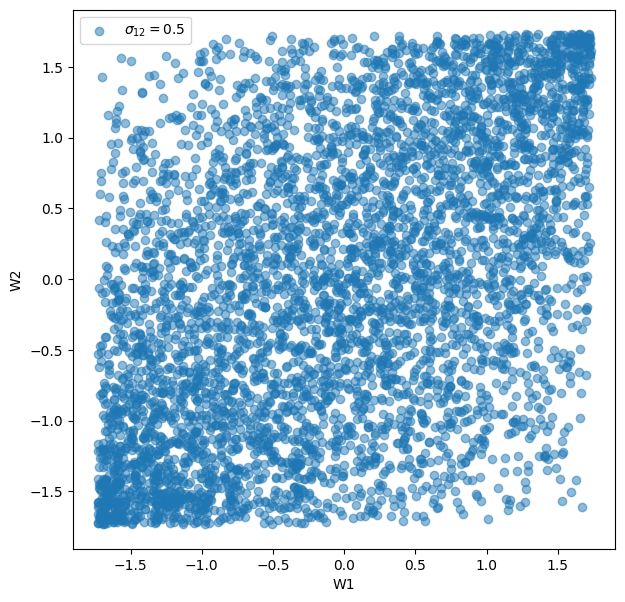

In [ ]:
def w1w2(a, b, sig, n):
    Sigma = np.array([[1.0, sig], [sig, 1.0]])

    Z = np.random.multivariate_normal([0, 0], Sigma, n)
    Z1 = Z[:, 0]
    Z2 = Z[:, 1]

    W1 = a + (b-a)*scipy.stats.norm.cdf(Z1)
    W2 = a + (b-a)*scipy.stats.norm.cdf(Z2)

    return W1, W2

W1, W2 = w1w2(a, b, 0.5, 5000)
plt.figure(figsize=(7,7))
plt.scatter(W1, W2, label=r'$\sigma_{12}=0.5$', alpha = 0.5)
plt.legend()
plt.xlabel('W1')
plt.ylabel('W2')

W1, W2 = w1w2(a, b, 0.5, 100000) # larger sample
p = np.mean((W1 >= 0) & (W2 >= 0))
print(f"P[W1 >= 0, W2 >= 0] = {p}")